In [1]:
## This file contains the basic function of cuffdiff analysis.
## Author: Xiang Li

###Sample
#### Imput Package
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

In [14]:
### Read input data from cuffdiff, a single file: gene_exp.diff
#### value_1=Con1_FPKM
#### value_2=Con2_FPKM
INPUT_PATH='/home/lxiang/cloud_research/PengGroup/ZZeng/Data/Haihui/Tcf1/HP_RNAseq/cuffdiff/DKO_vs_WT_72h/gene_exp.diff'
df=pd.read_csv(INPUT_PATH, header=0, sep='\t') #, usecols=['gene_id', 'sample_1', 'value_1', 'sample_2', 'value_2', 'log2(fold_change)', 'q_value'])
print("Raw Data shape:", df.shape)
################################################################################
#### First Step cleanning raw data.
df=df[(df.status == 'OK') & (df.significant == 'yes')]
print("Filtered Data shape:", df.shape)
################################################################################


('Raw Data shape:', (23951, 14))
('Filtered Data shape:', (1024, 14))


In [13]:
### Read input data from cuffdiff, multiple files: xxx/gene_exp.diff
### Given Cuffdiff results, and a specific criterion, pick up upregulated genes and downregulated genes.
#### value_1=Con1_FPKM
#### value_2=Con2_FPKM

Folder_Name_List=( 'Ctrl-n_dKO-n', 'Ctrl-n_Ctrl-s', 'dKO-n_dKO-s', 'Ctrl-s_dKO-s')
################################################################################
#### Filtered Criterion
FC_UP=1.5
q_value_less=0.05
FPKM=1.0
#### Filtered Criterion
################################################################################
for Folder_Name in Folder_Name_List:
    INPUT_PATH='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/Mar2018/Cuffdiff_Results/' + Folder_Name + '/gene_exp.diff'
    df=pd.read_csv(INPUT_PATH, header=0, sep='\t') #, usecols=['gene_id', 'sample_1', 'value_1', 'sample_2', 'value_2', 'log2(fold_change)', 'q_value'])
    
    #### First Step cleanning raw data.
    df=df[(df.status == 'OK') & (df.significant == 'yes')]
    #### First Step cleanning raw data.
################################################################################    
    #### Specific filtered criterion
    Upregulated_genes=df[ (df['value_2'] >= FPKM) & (df['log2(fold_change)'] >= (np.log(FC_UP)/np.log(2)) ) & (df['q_value'] <= q_value_less ) ]
    Upregulated_genes=Upregulated_genes.loc[:,['gene_id', 'sample_1','sample_2','value_1', 'value_2', 'log2(fold_change)', 'q_value']]
    print ('Upregulated_genes: ', Upregulated_genes.shape)

    df.columns
    Downregulated_genes=df[ (df['value_1'] >= FPKM) & ( df['log2(fold_change)'] <= -(np.log(FC_UP)/np.log(2)) ) & (df['q_value'] <= q_value_less ) ]
    Downregulated_genes=Downregulated_genes.loc[:,['gene_id', 'sample_1',  'sample_2','value_1', 'value_2', 'log2(fold_change)', 'q_value']]

    print ('Downregulated_genes: ', Downregulated_genes.shape)
    #### Specific filtered criterion
################################################################################  

####Output all gene list
    OUT_PATH='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/Mar2018/Cuffdiff_Results/Filtered_Gene_list'
    os.chdir(OUT_PATH)
    Upregulated_genes.to_csv('Upregulated_genes_'+Folder_Name+'.csv', sep='\t', index=None)
    Downregulated_genes.to_csv('Downregulated_genes_'+Folder_Name+'.csv', sep='\t', index=None)

('Upregulated_genes: ', (459, 7))
('Downregulated_genes: ', (171, 7))
('Upregulated_genes: ', (1316, 7))
('Downregulated_genes: ', (866, 7))
('Upregulated_genes: ', (132, 7))
('Downregulated_genes: ', (204, 7))
('Upregulated_genes: ', (29, 7))
('Downregulated_genes: ', (72, 7))


0.99999932734728203

In [27]:
#### Read all gene list

Upregulated_genes.to_csv('Upregulated_genes.csv', sep='\t', index=None)
Downregulated_genes.to_csv('Downregulated_genes.csv', sep='\t', index=None)

In [28]:
### This part is trying to give the difference between two similar dataframe
### Read two data frame, and merge them.
##############################################################################
df2=pd.read_csv('Upregulated_genes.csv', header=0, sep='\t', usecols=['gene_id', 'sample_1','sample_2', 'value_1',  'value_2', 'log2(fold_change)', 'q_value'])
df3=pd.read_csv('1866_zz.csv', header=0, sep=',') #, usecols=['gene_id', 'sample_1', 'value_1', 'sample_2', 'value_2', 'log2(fold_change)', 'q_value'])

df2_gene_id=pd.DataFrame(df2['gene_id'])
df3_gene_id=pd.DataFrame(df3['gene_id'])

gene_id_of_df2_df3 = df2_gene_id.merge(df3_gene_id, indicator=True, how='outer')
gene_id_of_df2_df3[gene_id_of_df2_df3['_merge']!='both']

In [57]:
### Merge Example

,gene_id,_merge
556,"Gm20605,Lrch4",left_only
629,"Hist1h4m,Hist1h4n",left_only
1319,"Tgoln1,Tgoln2",left_only


In [ ]:
merged=df2.merge(df3, indicator=True, how='outer')
merged[merged['_merge']!='both']

##############################################################################
### This part is trying to give the difference between two similar dataframe

In [326]:
####This part is to check the detail of how to calculate FPKM

Folder_Name_List=( 'Ctrl-n_Ctrl-s' , 'dKO-n_dKO-s', 'Ctrl-n_dKO-n', 'Ctrl-s_dKO-s')

Check_gene_id='Id3'

for Folder_Name in Folder_Name_List: 
    INPUT_PATH = '/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/RNA-seq/HP/Mar2018/Cuffdiff_Results/' +Folder_Name+ '/gene_exp.diff'

    df_list=pd.read_csv(INPUT_PATH, header=0, sep='\t', usecols=['gene_id', 'sample_1',  'sample_2', 'value_1', 'value_2' , 'log2(fold_change)', 'q_value'] )

    df_list= df_list.rename(columns={"value_1": df_list.loc[0,'sample_1'], "value_2": df_list.loc[0,'sample_2'],} )

    df_list=df_list.drop(df_list.columns[[1,2]], axis=1)

    #print ("Upregulated:")
    #print(df_list.shape)
    print( df_list[ df_list['gene_id'] == Check_gene_id ] )    

    #FPKM_df=FPKM_df.merge(df_UP_list, how='outer')
    #df_DOWN_list = pd.read_csv(INPUT_PATH_DOWN, header=0, sep='\t', usecols=['gene_id', 'sample_1', 'sample_2', 'value_1', 'value_2']) #, 'log2(fold_change)', 'q_value'])
    #df_DOWN_list = df_DOWN_list.rename(columns={"value_1": df_DOWN_list.loc[0,'sample_1'], "value_2": df_DOWN_list.loc[0,'sample_2'],} )
    #df_DOWN_list = df_DOWN_list.drop(df_DOWN_list.columns[[1,2]], axis=1)
#    print ("Downregulated:")
 #   print (df_DOWN_list.shape)
  #  print( df_DOWN_list[ df_DOWN_list['gene_id'] == Check_gene_id ] )
   # FPKM_df=FPKM_df.merge(df_DOWN_list, how='outer')
#df2=pd.read_csv('/home/lxiang/cloud_research/PengGroup/ZZeng/Data/Haihui/Tcf1/HP_RNAseq/cuffdiff/WT/gene_exp.diff', header=0, sep='\t')

#print(df2.head())

#print(df2.shape)

#print( df2[ df2['test_id'] == 'Eno1' ] )

#df3=pd.read_csv('/home/lxiang/cloud_research/PengGroup/ZZeng/Data/Haihui/Tcf1/HP_RNAseq/cuffdiff/WT/genes.read_group_tracking', header=0, sep='\t') #, usecols=['gene_id', 'sample_1', 'value_1', 'sample_2', 'value_2', 'log2(fold_change)', 'q_value'])

#print(df3.head())

#print(df3.shape)

#print( df3[ df3['tracking_id'] == 'Eno1' ] )

####This part is to check the detail of how to calculate FPKM

      gene_id   Ctrl-n   Ctrl-s  log2(fold_change)   q_value
10265     Id3  47.5433  60.8576           0.356194  0.052106
      gene_id    dKO-n    dKO-s  log2(fold_change)   q_value
10265     Id3  102.078  90.4976          -0.173727  0.999125
      gene_id   Ctrl-n    dKO-n  log2(fold_change)   q_value
10265     Id3  45.6801  101.827            1.15649  0.003342
      gene_id   Ctrl-s    dKO-s  log2(fold_change)   q_value
10265     Id3  62.2884  96.1898           0.626919  0.999273


In [179]:
df_UP_list.loc[12,'sample_1']
pd.__version__

u'0.19.2'

In [310]:
#### Run heatmap for each library.

Folder_Name_List=( {'Ctrl-n_Ctrl-s'} , {'dKO-n_dKO-s'}, {'Ctrl-n_dKO-n'}, {'Ctrl-s_dKO-s'} ) 
Folder_Name_List=( 'Ctrl-n_Ctrl-s' , 'dKO-n_dKO-s', 'Ctrl-n_dKO-n', 'Ctrl-s_dKO-s') 
FPKM_df=pd.DataFrame({'gene_id':[]})

Check_gene_id='Id3'

for Folder_Name in Folder_Name_List:
    INPUT_PATH_UP='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/RNA-seq/HP/Mar2018/Cuffdiff_Results/Gene_filtered/Upregulated_genes' + Folder_Name + '.csv'
    INPUT_PATH_DOWN='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/RNA-seq/HP/Mar2018/Cuffdiff_Results/Gene_filtered/Downregulated_genes' + Folder_Name +  '.csv'

    df_UP_list=pd.read_csv(INPUT_PATH_UP, header=0, sep='\t', usecols=['gene_id', 'sample_1',  'sample_2', 'value_1', 'value_2']) #, 'log2(fold_change)', 'q_value'] 
    
    df_UP_list= df_UP_list.rename(columns={"value_1": df_UP_list.loc[0,'sample_1'], "value_2": df_UP_list.loc[0,'sample_2'],} )
    df_UP_list=df_UP_list.drop(df_UP_list.columns[[1,2]], axis=1)
    
    print ("Upregulated:")
    print(df_UP_list.shape)
    print( df_UP_list[ df_UP_list['gene_id'] == Check_gene_id ] )    
    
    FPKM_df=FPKM_df.merge(df_UP_list, how='outer')
    
    
    df_DOWN_list = pd.read_csv(INPUT_PATH_DOWN, header=0, sep='\t', usecols=['gene_id', 'sample_1',  'sample_2', 'value_1', 'value_2']) #, 'log2(fold_change)', 'q_value']) 
    df_DOWN_list = df_DOWN_list.rename(columns={"value_1": df_DOWN_list.loc[0,'sample_1'], "value_2": df_DOWN_list.loc[0,'sample_2'],} )
    df_DOWN_list = df_DOWN_list.drop(df_DOWN_list.columns[[1,2]], axis=1)
    
    print ("Downregulated:")
    print (df_DOWN_list.shape)
    print( df_DOWN_list[ df_DOWN_list['gene_id'] == Check_gene_id ] )
    
    FPKM_df=FPKM_df.merge(df_DOWN_list, how='outer')
    #
    
    
    #diff_gene_list = diff_gene_list + df_UP + df_DOWN
FPKM_df=FPKM_df.set_index('gene_id')
FPKM_df=FPKM_df.fillna(0)
#sns.clustermap(np.log1p(FPKM_df))

#print(FPKM_df)

Upregulated:
(1316, 3)
Empty DataFrame
Columns: [gene_id, Ctrl-n, Ctrl-s]
Index: []
Downregulated:
(866, 3)
Empty DataFrame
Columns: [gene_id, Ctrl-n, Ctrl-s]
Index: []
Upregulated:
(132, 3)
Empty DataFrame
Columns: [gene_id, dKO-n, dKO-s]
Index: []
Downregulated:
(204, 3)
Empty DataFrame
Columns: [gene_id, dKO-n, dKO-s]
Index: []
Upregulated:
(459, 3)
    gene_id   Ctrl-n    dKO-n
190     Id3  45.6801  101.827
Downregulated:
(171, 3)
Empty DataFrame
Columns: [gene_id, Ctrl-n, dKO-n]
Index: []
Upregulated:
(29, 3)
Empty DataFrame
Columns: [gene_id, Ctrl-s, dKO-s]
Index: []
Downregulated:
(72, 3)
Empty DataFrame
Columns: [gene_id, Ctrl-s, dKO-s]
Index: []


(132, 3)


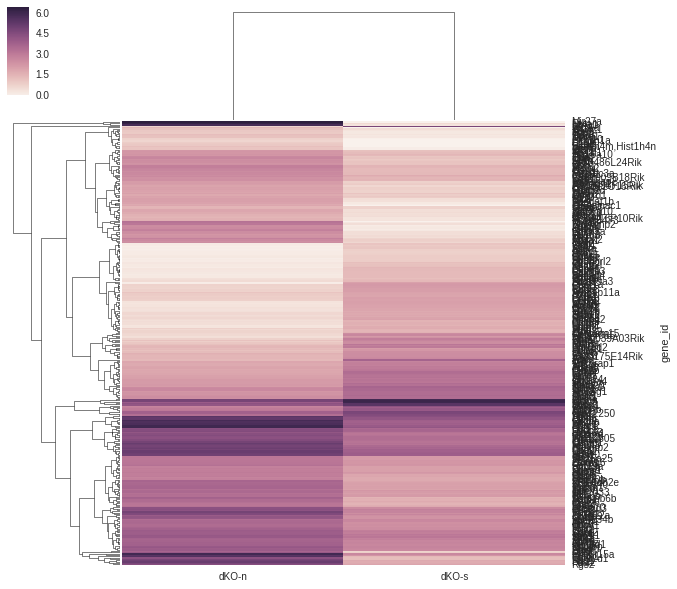

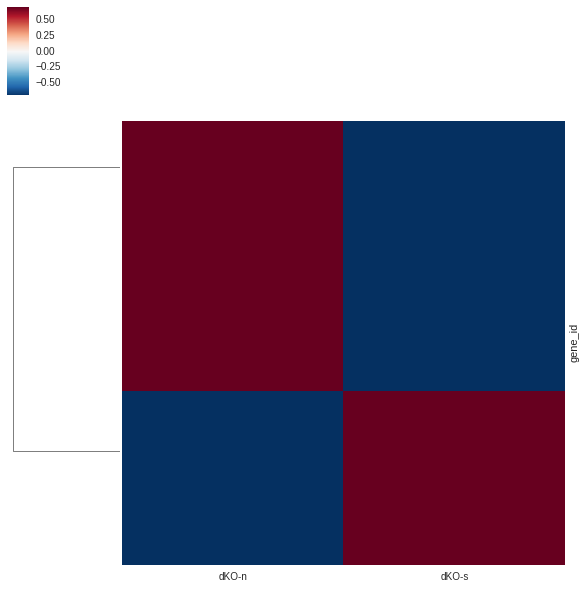

In [288]:
Folder_Name_List=( {'dKO-n_dKO-s'}) 
FPKM_df=pd.DataFrame({'gene_id':[]})

for Folder_Name in Folder_Name_List:
    INPUT_PATH_UP='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/RNA-seq/HP/Mar2018/Cuffdiff_Results/Gene_filtered/Upregulated_genes' + Folder_Name + '.csv'
    INPUT_PATH_DOWN='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/RNA-seq/HP/Mar2018/Cuffdiff_Results/Gene_filtered/Downregulated_genes' + Folder_Name +  '.csv'

    df_UP_list=pd.read_csv(INPUT_PATH_UP, header=0, sep='\t', usecols=['gene_id', 'sample_1',  'sample_2', 'value_1', 'value_2']) #, 'log2(fold_change)', 'q_value'] 
    
    df_UP_list= df_UP_list.rename(columns={"value_1": df_UP_list.loc[0,'sample_1'], "value_2": df_UP_list.loc[0,'sample_2'],} )
    df_UP_list=df_UP_list.drop(df_UP_list.columns[[1,2]], axis=1)
    print(df_UP_list.shape)
    
    FPKM_df=FPKM_df.merge(df_UP_list, how='outer')
    
    
    df_DOWN_list = pd.read_csv(INPUT_PATH_DOWN, header=0, sep='\t', usecols=['gene_id', 'sample_1',  'sample_2', 'value_1', 'value_2']) #, 'log2(fold_change)', 'q_value']) 
    df_DOWN_list = df_DOWN_list.rename(columns={"value_1": df_DOWN_list.loc[0,'sample_1'], "value_2": df_DOWN_list.loc[0,'sample_2'],} )
    df_DOWN_list = df_DOWN_list.drop(df_DOWN_list.columns[[1,2]], axis=1)
    
   # print (df_DOWN_list)
    
    FPKM_df=FPKM_df.merge(df_DOWN_list, how='outer')
    #
    
    
    #diff_gene_list = diff_gene_list + df_UP + df_DOWN
    FPKM_df=FPKM_df.set_index('gene_id')
    
    #### This command is only valid for NaN item.
    #FPKM_df=FPKM_df.fillna(0)
    
    fig_1 = sns.clustermap(np.log1p(FPKM_df))
    #fig_2 = sns.clustermap(FPKM_df, col_cluster=False, yticklabels=False, z_score=0)
    #fig_2 = sns.(np.log1p(FPKM_df))
    #fig_1.savefig('Heatmap1_'+Folder_Name+'.png')
    #fig_2.savefig('Heatmap2_'+Folder_Name+'.png')